In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import mdp

In [3]:
import ucrl2

In [19]:
import itertools

In [99]:
def process_trajectory(trajectory, opt_avg_reward, replace_r=None):
    regrets = []
    per_step_regret = []
    tt = []
    acc_regret = 0
    for (t, st, ac, next_st, r) in trajectory:
        # Undo the shaping when accounting for regret
        if replace_r is not None:
            r = replace_r[st, ac]
        acc_regret += opt_avg_reward - r
        regrets.append(acc_regret)
        per_step_regret.append(acc_regret / t)
        tt.append(t)

    sregret = np.asarray(regrets)
    per_step_regret = np.asarray(per_step_regret)
    tt = np.asarray(tt)
    return regrets, per_step_regret, tt

In [279]:
opt_avg_reward = 1
delta = 0.5

In [283]:
# Collect sample trajectories
# UCRL2 on the two-state MDP
n_trajs = 20
len_trajs = 200000
trajs = []
for _ in range(n_trajs):
    #     
    tr = ucrl2.ucrl2(example_mdp, delta, initial_state=0)
    traj = []
    for _ in range(len_trajs):
        (t, st, ac, next_st, r) = next(tr)
        traj.append((t, st, ac, next_st, r))
    trajs.append(traj)

In [284]:
trajs[0][-20:]

[(199981, 1, 0, 1, 1.0),
 (199982, 1, 0, 1, 1.0),
 (199983, 1, 0, 1, 1.0),
 (199984, 1, 0, 1, 1.0),
 (199985, 1, 0, 1, 1.0),
 (199986, 1, 0, 1, 1.0),
 (199987, 1, 0, 1, 1.0),
 (199988, 1, 0, 1, 1.0),
 (199989, 1, 0, 1, 1.0),
 (199990, 1, 0, 1, 1.0),
 (199991, 1, 0, 1, 1.0),
 (199992, 1, 0, 1, 1.0),
 (199993, 1, 0, 1, 1.0),
 (199994, 1, 0, 1, 1.0),
 (199995, 1, 0, 1, 1.0),
 (199996, 1, 0, 1, 1.0),
 (199997, 1, 0, 1, 1.0),
 (199998, 1, 0, 1, 1.0),
 (199999, 1, 0, 1, 1.0),
 (200000, 1, 0, 1, 1.0)]

In [285]:
# UCRL2 on the shaped two-state MDP
# Instead of implementing potential-shaped UCRL2, we let UCRL2 interact 
# with the shaped MDP--same as within potential-shaped UCRL2--and 
# sum up the actual rewards in the original MDP later. This can be done
# because a sample trajectory logs all the state-action pairs
phi_trajs = []
for _ in range(n_trajs):
    tr = ucrl2.ucrl2(example_mdp_phi, delta, initial_state=0)
    traj = []
    for _ in range(len_trajs):
        (t, st, ac, next_st, r) = next(tr)
        traj.append((t, st, ac, next_st, r))
    phi_trajs.append(traj)

In [286]:
phi_trajs[0][-20:]

[(199981, 1, 0, 1, 1.0),
 (199982, 1, 0, 1, 1.0),
 (199983, 1, 0, 1, 1.0),
 (199984, 1, 0, 1, 1.0),
 (199985, 1, 0, 1, 1.0),
 (199986, 1, 0, 1, 1.0),
 (199987, 1, 0, 1, 1.0),
 (199988, 1, 0, 1, 1.0),
 (199989, 1, 0, 1, 1.0),
 (199990, 1, 0, 1, 1.0),
 (199991, 1, 0, 1, 1.0),
 (199992, 1, 0, 1, 1.0),
 (199993, 1, 0, 1, 1.0),
 (199994, 1, 0, 1, 1.0),
 (199995, 1, 0, 1, 1.0),
 (199996, 1, 0, 1, 1.0),
 (199997, 1, 0, 1, 1.0),
 (199998, 1, 0, 1, 1.0),
 (199999, 1, 0, 1, 1.0),
 (200000, 1, 0, 1, 1.0)]

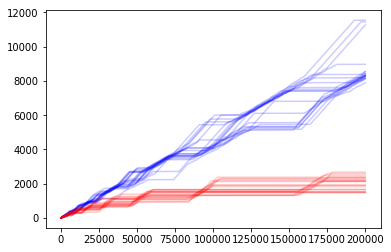

In [294]:
# plot(bound, '--')
for traj in trajs:
    plot(process_trajectory(traj, 1)[0], alpha=0.2, c='b')

for traj in phi_trajs:
    plot(process_trajectory(traj, 1, replace_r=example_mdp.r)[0], alpha=0.2, c='r')

xlabel('T')
ylabel('\Delta')

In [325]:
def plot_trajs(trajs, opt_avg_reward, color, replace_r=None, label=None, alpha=0.2):
    n_trajs = len(trajs)
    len_trajs = len(trajs[0])
    mean_tot_regret = np.zeros(len_trajs)
    for traj in trajs:
        tot_regret = process_trajectory(traj, opt_avg_reward, replace_r)[1]
        mean_tot_regret += tot_regret / n_trajs
        plot(tot_regret, alpha=alpha, c=color)
    plot(mean_tot_regret, c=color, label=label)

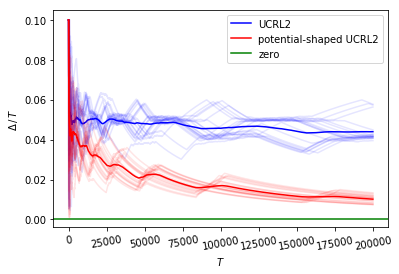

In [327]:
plot_trajs(trajs, 1, 'b', label='UCRL2', alpha=0.1)
plot_trajs(phi_trajs, 1, 'r', replace_r=example_mdp.r, label='potential-shaped UCRL2', alpha=0.1)
axhline(0, c='g', label='zero')

legend()
xlabel('$T$')
ylabel('$\Delta\, /\, T$')
xticks(rotation=10)
savefig('per-step-regret.pdf')

In [249]:
eps = 0.01
alpha = 0.1
p = [
        [
            [1, 0], # Staying at state 1
            [1 - eps, eps], # Go to state 2
        ], 
        [
            [0, 1], # Staying at state 2
            [eps, 1 - eps] # Go to state 2
        ],
     ]
r = [
        [1 - alpha, 1 - alpha],
        [1, 1],
    ]
example_mdp = mdp.SimpleMDP(2, 2, p, r)

In [251]:
example_phi = [0, alpha / 2 / eps]

In [252]:
example_phi

[0, 5.0]

In [235]:
# Potential-shaped rewards
def shape_rewards(reward, transition, potential):
    n_states, n_actions = reward.shape
    r_phi = reward.copy()
    for st, ac in itertools.product(range(n_states), range(n_actions)):
        r_phi[st, ac] += (transition[st, ac] * potential).sum() - potential[st]
    return r_phi

In [254]:
r_phi = shape_rewards(example_mdp.r, example_mdp.p, example_phi)

In [256]:
r_phi

array([[0.9 , 0.95],
       [1.  , 0.95]])

In [257]:
example_mdp_phi = mdp.SimpleMDP(2, 2, p, r_phi)

In [297]:
alphas = arange(0.01, 0.9, 0.05)

In [298]:
alphas

array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86])

In [300]:
# Create a set of two-state MDPs with the given alphas
mdps = []
for alpha in alphas:
    r = [
            [1 - alpha, 1 - alpha],
            [1, 1],
        ]
    mdps.append(mdp.SimpleMDP(2, 2, p, r))

In [312]:
# Generate 2 samples for the total regret at T = 10^5 per M_alpha
n_trajs = 2
len_trajs = 100000
atrs = []

for m in mdps:
    avg_last_tot_regret = 0
    for _ in range(n_trajs):
        tr = ucrl2.ucrl2(m, delta, initial_state=0)
        traj = []
        for _ in range(len_trajs):
            (t, st, ac, next_st, r) = next(tr)
            traj.append((t, st, ac, next_st, r))
        tot_regret = process_trajectory(traj, opt_avg_reward)[0]
        avg_last_tot_regret += tot_regret[-1] / n_trajs
    atrs.append(avg_last_tot_regret)

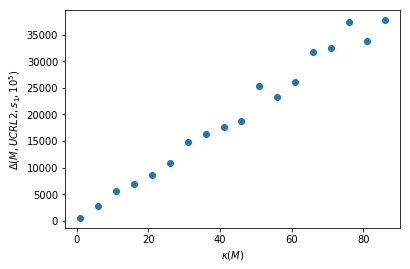

In [323]:
# Note that the kappa(M_alpha) = alpha / eps
# Plot total regret at T=10^5 vs kappa(M_alpha)
scatter(alphas / eps, atrs)

xlabel('$\kappa(M)$')
ylabel('$\Delta(M, UCRL2, s_1, 10^5)$')
savefig('kappa-regret.pdf')